In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random


In [15]:

def transformation(x, y):
    x_new = np.zeros(5)
    y_new = np.zeros(5)
    x_new[0] = x[0]
    y_new[0] = y[0]
    x_new[1] = x[0] + (x[1] - x[0]) / 3
    x_new[2] = x_new[1] + 1 / 3 * (
            (x[1] - x[0]) / 2 - np.sqrt(3) * (y[1] - y[0]) / 2)
    x_new[3] = x[0] + 2 / 3 * (x[1] - x[0])
    y_new[1] = y[0] + (y[1] - y[0]) / 3
    y_new[2] = y_new[1] + 1 / 3 * (
            (y[1] - y[0]) / 2 + np.sqrt(3) * (x[1] - x[0]) / 2)
    y_new[3] = y[0] + 2 * (y[1] - y[0]) / 3
    x_new[4] = x[1]
    y_new[4] = y[1]
    return x_new, y_new







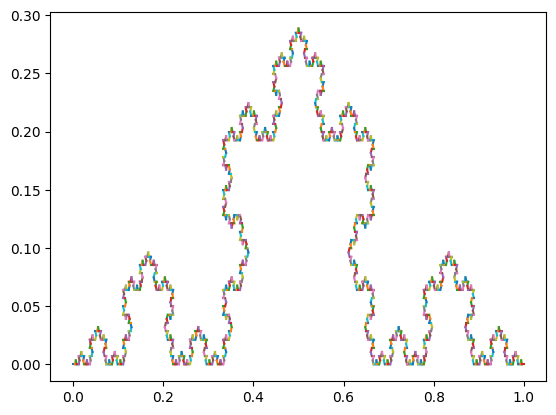

In [16]:
def koch(x, y, n):
    if n == 0:
        plt.plot(x, y)
    else:
        x1_new, y1_new = transformation(x, y)
        koch([x1_new[0], x1_new[1]], [y1_new[0], y1_new[1]], n - 1)
        koch([x1_new[1], x1_new[2]], [y1_new[1], y1_new[2]], n - 1)
        koch([x1_new[2], x1_new[3]], [y1_new[2], y1_new[3]], n - 1)
        koch([x1_new[3], x1_new[4]], [y1_new[3], y1_new[4]], n - 1)
x = [0, 1]
y = [0, 0]

koch(x, y, 5)
plt.show()

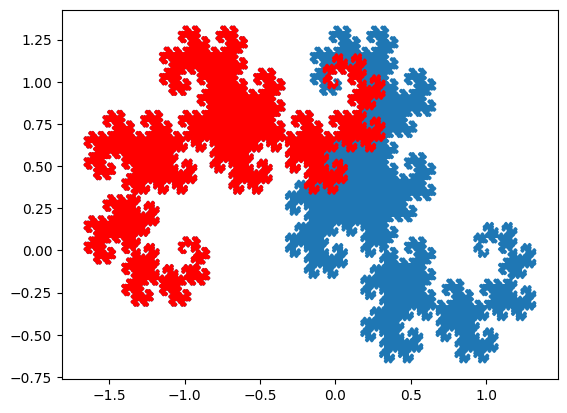

In [17]:
#heighway_dragon
X_in = np.array([-1,1])
Y_in = np.array([0,0])
n_iter = 15

for j in range(n_iter):
    L = len(X_in)
    X_out = np.zeros(2*L-1)
    Y_out = np.zeros(2*L-1)
    for i in range(L-1):
            X_out[2*i] = X_in[i]
            X_out[2*i+1] = X_in[i] + ( (X_in[i+1] - X_in[i]) - ((-1)**i)*(Y_in[i+1] - Y_in[i]) )/2
            Y_out[2*i] = Y_in[i]
            Y_out[2*i+1] = Y_in[i] + ( ((-1)**i)*(X_in[i+1] - X_in[i]) + (Y_in[i+1] - Y_in[i]) )/2
    X_out[2*L-2] = X_in[L-1]
    Y_out[2*L-2] = Y_in[L-1]
    X_in = X_out
    Y_in = Y_out

# to make sure that the shape does not cross itself
a = int(len(X_in)/2)
X_half = X_in[range(a)]
Y_half = Y_in[range(a)]

plt.plot(X_in,Y_in)
plt.plot(X_half,Y_half,'red')
plt.show()


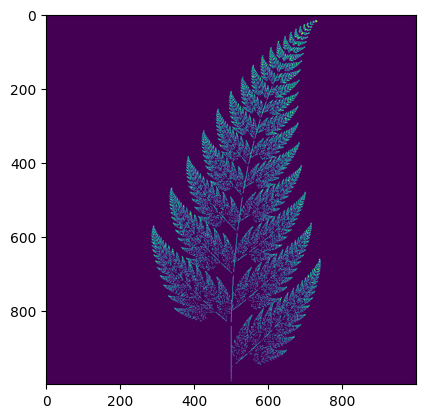

In [18]:
def f1(r):
    R = np.array([[0, 0], [0, 0.16]])
    b = np.dot(R, r)
    return b


def f2(r):
    R = np.array([[0.85, 0.04], [-0.04, 0.85]])
    a = np.array([[0], [1.6]])
    b = np.dot(R, r) + a
    return b


def f3(r):
    R = np.array([[0.2, -0.26], [0.23, 0.22]])
    a = np.array([[0], [1.6]])
    b = np.dot(R, r) + a
    return b


def f4(r):
    R = np.array([[-0.15, 0.28], [0.26, 0.24]])
    a = np.array([[0], [0.44]])
    b = np.dot(R, r) + a
    return b


F = [f1, f2, f3, f4]

N = 100000
n = 1000
points = np.zeros((n, n))

for j in range(N):
    r = np.array([[random.random()], [random.random()]])
    for i in range(20):
        R = np.random.choice([0, 1, 2, 3],
                             p=[0.01, 0.85, 0.07, 0.07])
        r = F[R](r)
    x, y = int(r[0] * n / 10 + n / 2), int(r[
                                               1] * n / 10)
    points[y, x] = 1

plt.imshow(points[::-1, :])
plt.show()


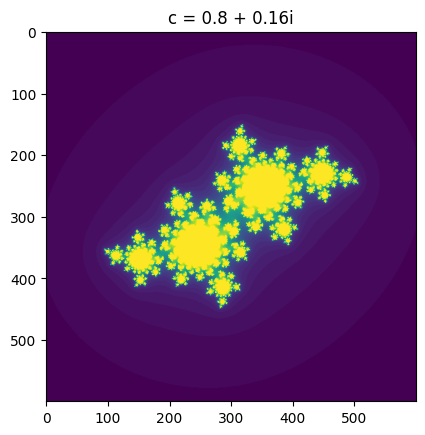

In [19]:
X = 2
Y = 2
N = 600
R = 200
cutoff = 50
c = complex(-0.4, 0.6)
chi = 0
Value = np.zeros((N, N))

for n_x in range(N):
    for n_y in range(N):
        z = complex(-X + n_x / N * (2 * X), -Y + n_y / N * (2 * Y))
        chi = 0
        while chi < cutoff and abs(z) < R:
            z = z * z + c
            chi = chi + 1
        Value[n_y, n_x] = chi

plt.imshow(Value)
plt.title('c = 0.8 + 0.16i')
plt.show()